<a href="https://colab.research.google.com/github/aizatulin69/goit-ds-hw-14/blob/main/Hw14_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    input_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 44s 302ms/step - acc: 0.5600 - loss: 0.6808 - val_acc: 0.7835 - val_loss: 0.4853
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 304ms/step - acc: 0.7930 - loss: 0.4601 - val_acc: 0.8304 - val_loss: 0.3892
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - acc: 0.8536 - loss: 0.3605 - val_acc: 0.8400 - val_loss: 0.3736
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - acc: 0.8742 - loss: 0.3210 - val_acc: 0.8516 - val_loss: 0.3488
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - acc: 0.8881 - loss: 0.2899 - val_acc: 0.8660 - val_loss: 0.3415


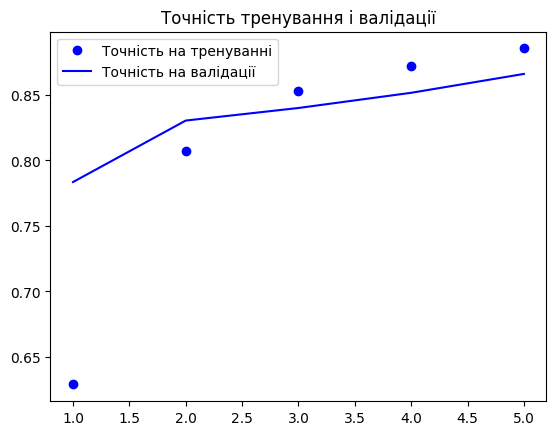

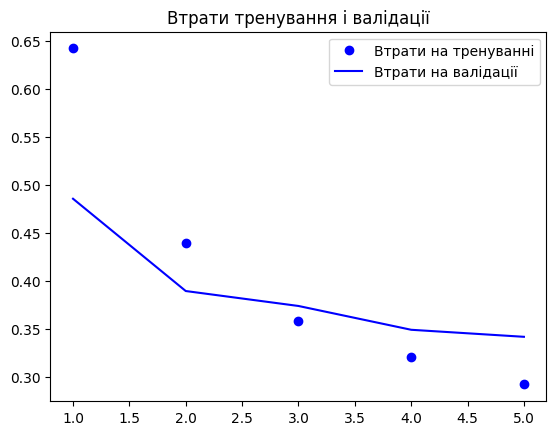

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - acc: 0.8583 - loss: 0.3584
Test Loss: 0.35179734230041504
Test Accuracy: 0.8611199855804443
